## <b> <span style='color:#e61227'>|</span> Traffic Signs Detection Using YOLOv8 </b> 

In [ ]:
from IPython.core.display import display, HTML, Javascript

color_map = ['#FFFFFF','#FF5733']

prompt = color_map[-1]
main_color = color_map[0]
strong_main_color = color_map[1]
custom_colors = [strong_main_color, main_color]

css_file = '''
div #notebook {
background-color: white;
line-height: 20px;
}

#notebook-container {
%s
margin-top: 2em;
padding-top: 2em;
border-top: 4px solid %s;
-webkit-box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
    box-shadow: 0px 0px 8px 2px rgba(224, 212, 226, 0.5);
}

div .input {
margin-bottom: 1em;
}

.rendered_html h1, .rendered_html h2, .rendered_html h3, .rendered_html h4, .rendered_html h5, .rendered_html h6 {
color: %s;
font-weight: 600;
}

div.input_area {
border: none;
    background-color: %s;
    border-top: 2px solid %s;
}

div.input_prompt {
color: %s;
}

div.output_prompt {
color: %s; 
}

div.cell.selected:before, div.cell.selected.jupyter-soft-selected:before {
background: %s;
}

div.cell.selected, div.cell.selected.jupyter-soft-selected {
    border-color: %s;
}

.edit_mode div.cell.selected:before {
background: %s;
}

.edit_mode div.cell.selected {
border-color: %s;

}
'''

def to_rgb(h): 
    return tuple(int(h[i:i+2], 16) for i in [0, 2, 4])

main_color_rgba = 'rgba(%s, %s, %s, 0.1)' % (to_rgb(main_color[1:]))
open('notebook.css', 'w').write(css_file % ('width: 95%;', main_color, main_color, main_color_rgba, 
                                            main_color,  main_color, prompt, main_color, main_color, 
                                            main_color, main_color))

def nb(): 
    return HTML("<style>" + open("notebook.css", "r").read() + "</style>")
nb()


![](https://learnopencv.com/wp-content/uploads/2023/01/evolution-of-yolo-models-1024x576.png)

## <b>1 <span style='color:#e61227'>|</span> Introduction</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.1 |</span></b> Object Detection </b></p>
</div>

**Computer vision** is a field of artificial intelligence that focuses on teaching computers to interpret and understand visual information. One popular and powerful technique used in computer vision for object detection is called **YOLO**, which stands for "You Only Look Once".

YOLO aims to identify and locate objects in an image or video stream in real-time. Unlike traditional methods that rely on complex pipelines and multiple passes, YOLO takes a different approach by treating object detection as a single regression problem.

This algorithm divides the input image into a grid and predicts bounding boxes and class probabilities for objects within each grid cell. It simultaneously predicts the class labels and their corresponding bounding boxes, making it incredibly efficient and fast. YOLO is known for its real-time performance, enabling it to process images and videos at impressive speeds.

By leveraging **deep convolutional neural networks**, YOLO can learn to recognize a wide range of objects and accurately localize them within an image. It can detect multiple objects of different classes simultaneously, making it particularly useful for applications where **real-time processing** and high detection accuracy are crucial, such as **autonomous driving**, **video surveillance**, and **robotics**.


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>1.2 |</span></b> YOLOv8 </b></p>
</div>

**YOLOv8** is the latest version of the YOLO AI model developed by **Ultralytics**, which has shown effectiveness in tackling tasks such as **classification**, **object detection**, and **image segmentation**. **YOLOv8 models** are fast, accurate, and easy to use, making them ideal for various object detection and image segmentation tasks. They can be trained on large datasets and run on diverse hardware platforms, from **CPUs** to **GPUs**.
YOLOv8 _detection_ models have no suffix and are the default YOLOv8 models, i.e. **yolov8n.pt** ,and are pre-trained on COCO. See [Detection Docs ](https://docs.ultralytics.com/tasks/detect/) for full details.

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>1.3 |</span></b> Study Aim </b></p>
</div>

Implementing **Sign Detection** using **YOLOv8** holds tremendous potential across a wide range of practical applications. For example, it can greatly enhance **traffic management systems**, allowing for the efficient detection and recognition of various traffic signs. This technology can play a vital role in improving road safety by enabling vehicles to accurately interpret and respond to the information conveyed by road signs. Moreover, sign detection using YOLOv8 can assist in urban planning and infrastructure development by analyzing the presence and condition of signs in different areas

By undertaking this project, I aimed to harness the power of YOLOv8 to develop a **reliable signs detection solution** with the potential to improve various domains that rely on precise and efficient signs identification.


## <b>2 <span style='color:#e61227'>|</span> Install And Import Essential Libreries</b> 


In [1]:
# Install Essential Libraries
!pip install ultralytics

In [5]:
# Import Essential Libraries
import os
import random
import pandas as pd
from PIL import Image
import cv2
from ultralytics import YOLO
from IPython.display import Video
import numpy as np  
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
import pathlib
import glob
from tqdm.notebook import trange, tqdm
import warnings
warnings.filterwarnings('ignore')

## <b>3 <span style='color:#e61227'>|</span> Dataset</b> 

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>3.1 |</span></b> Show Original Images Before Detect </b></p>
</div>

***3.1.1. Show Some Images From TrainSet***

In [3]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="yEajTRRblrPKxKARkIr0")
project = rf.workspace("traffic-sign-lvyrj").project("noon.clearnoon")
dataset = project.version(1).download("yolov8")


loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.229, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Noon.ClearNoon-1 in yolov8:: 100%|██████████████████████████| 746/746 [00:00<00:00, 5640.11it/s]


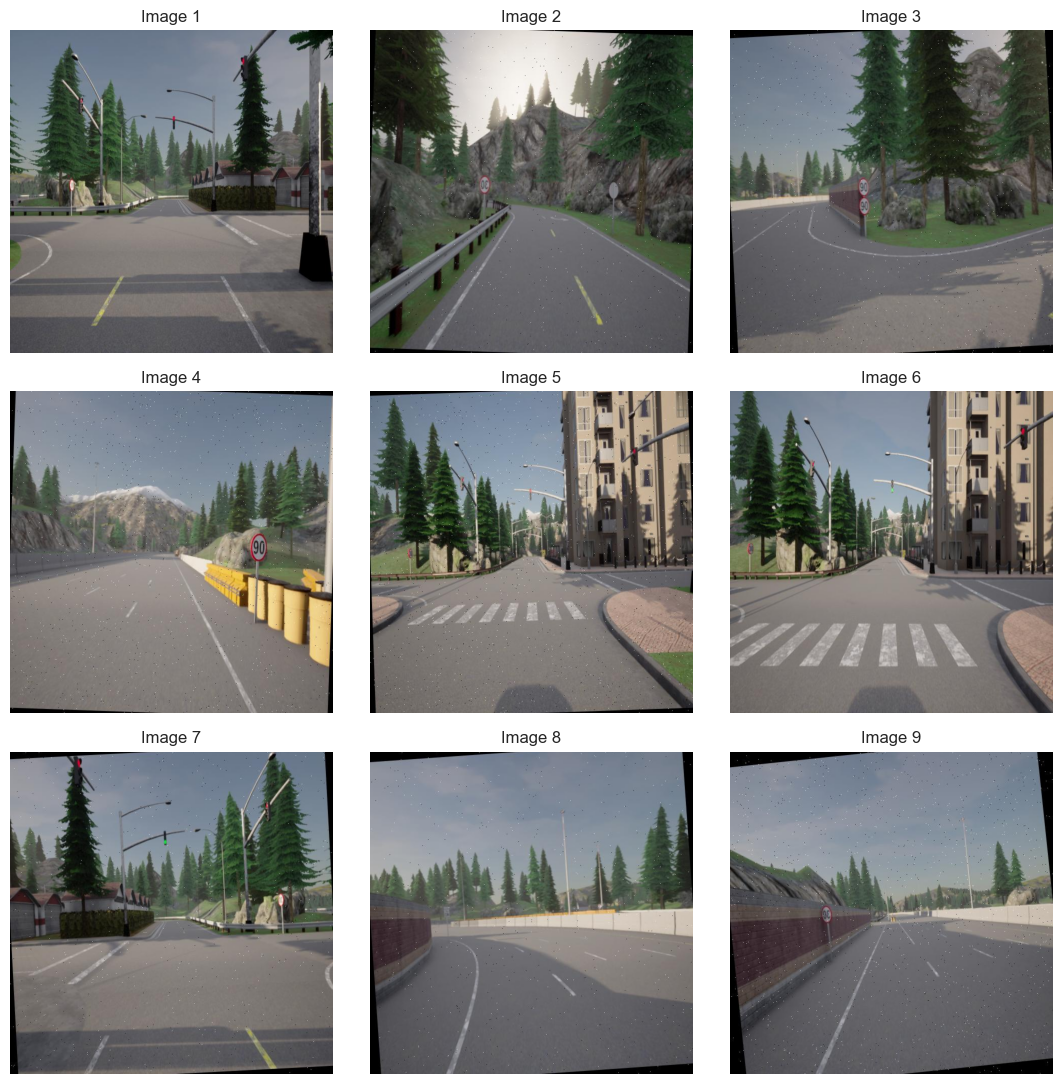

In [2]:
Image_dir = './Noon.ClearNoon-1/train/images'

num_samples = 9
image_files = os.listdir(Image_dir)

# Randomly select num_samples images
rand_images = random.sample(image_files, num_samples)

fig, axes = plt.subplots(3, 3, figsize=(11, 11))

for i in range(num_samples):
    image = rand_images[i]
    ax = axes[i // 3, i % 3]
    ax.imshow(plt.imread(os.path.join(Image_dir, image)))
    ax.set_title(f'Image {i+1}')
    ax.axis('off')

plt.tight_layout()
plt.show()

***3.1.2. Get Shape Of An Image For Using In Training Step***

In [3]:
# Get the size of the image
image = cv2.imread("./Noon.ClearNoon-1/train/images/00001679_png.rf.5592231fdd1b94cbaa29b4f41234375c.jpg")
h, w, c = image.shape
print(f"The image has dimensions {w}x{h} and {c} channels.")

The image has dimensions 640x640 and 3 channels.


## <b>4 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs  </b>

In [3]:
from ultralytics import YOLO


image 1/1 /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/train/images/00001679_png.rf.5592231fdd1b94cbaa29b4f41234375c.jpg: 640x640 1 Speed30, 104.7ms
Speed: 1.9ms preprocess, 104.7ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


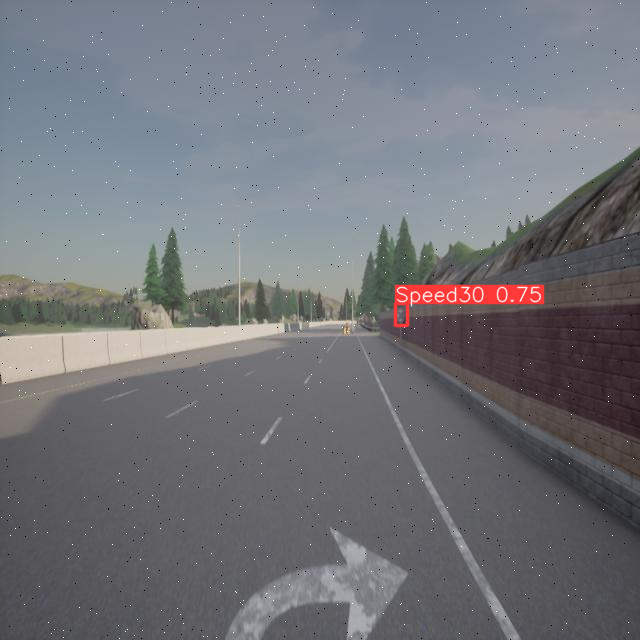

In [4]:
# Use a pretrained YOLOv8n model
model = YOLO("best.pt") 

# Use the model to detect object
image = "./Noon.ClearNoon-1/train/images/00001679_png.rf.5592231fdd1b94cbaa29b4f41234375c.jpg"
result_predict = model.predict(source = image)

# show results
plot = result_predict[0].plot()
plot = cv2.cvtColor(plot, cv2.COLOR_BGR2RGB)
display(Image.fromarray(plot))

In [ ]:
for detection in result_predict:
    print(detection.boxes)
    

In [63]:
for detection in result_predict.xyxy[0]:
    print(detection[3])


AttributeError: 'list' object has no attribute 'xyxy'

In [ ]:
import cv2
from PIL import Image
import numpy as np

for detection in result_predict:
    # Print available attributes
    print("Class ID:", detection.boxes.cls)
    print("Confidence:", detection.boxes.conf)
    
    # Bounding box in XYXY format
    bbox_xyxy = detection.boxes.xyxy
    print("Bounding Box (XYXY):", bbox_xyxy)
    
    # Convert the tensor to a numpy array for easier manipulation if necessary
    bbox_xyxy_np = bbox_xyxy.numpy()
    print("Bounding Box (XYXY) as NumPy Array:", bbox_xyxy_np)
    
    # Example: Extracting the first bounding box (if multiple detections are expected, iterate over them)
    if bbox_xyxy_np.size > 0:
        x_min, y_min, x_max, y_max = bbox_xyxy_np[0]
        print(bbox_xyxy_np)
        # Now you can use these bounding box coordinates as needed
        # For example, draw the bounding box on the original image
        # Load the original image
        image_path = detection.boxes.orig_shape  # Assuming this path is stored or accessible
        image = cv2.imread(image)
        
        # Draw the bounding box
        color = (255, 0, 0)  # Blue color in BGR
        thickness = 2
        image_with_bbox = cv2.rectangle(image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), color, thickness)
        
        # Display the image
        cv2.imshow("Image with Bounding Box", image_with_bbox)
        cv2.waitKey(0)
        cv2.destroyAllWindows()


Class ID: tensor([0.])
Confidence: tensor([0.7508])
Bounding Box (XYXY): tensor([[395.7029, 303.9430, 407.0028, 325.1945]])
Bounding Box (XYXY) as NumPy Array: [[      395.7      303.94         407      325.19]]
[[      395.7      303.94         407      325.19]]


## <b>5 <span style='color:#e61227'>|</span> YOLOv8-Based Traffic Signs Detection Model</b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.1 |</span></b> Model Training Using Customized Dataset Of Traffic Signs </b></p>
</div>
        
***Mean Average Precision (mAP)*** is a metric used to evaluate the effectiveness of object detection algorithms in identifying and locating objects within images. It takes into account both precision and recall across different categories. By calculating the Average Precision (AP) for each category and taking the average, mAP provides an overall assessment of the algorithm's performance.

If the obtained mAP after the final epoch is not satisfactory, there are several options available to improve the results:
- Extending the training process by increasing the number of **epochs**: Training for more epochs allows the model to learn more patterns and potentially improve its performance. You can specify a higher value for the --epochs argument when running the training command.
- Experimenting with different **parameter values**: You can try adjusting various parameters to see if they have a positive impact on the results. Some parameters to consider are:
- **Batch Size:** Changing the batch size can affect the convergence and generalization of the model. You can modify the --batch-size argument to find an optimal value.
- **Initial Learning Rate (lr0)**: The initial learning rate determines the step size at the beginning of the training process. You can tune the --lr0 parameter to control how quickly the model learns.
- **Learning Rate Range (lrf)**: The learning rate range determines the range of learning rates used during the training. Experimenting with different values for --lrf can help find a better learning rate schedule.
- **Selecting a different optimizer**: The optimizer is responsible for updating the model's parameters based on the calculated gradients. Changing the optimizer can sometimes lead to better convergence and results. Ultralytics YOLOv8 supports different optimizers such as SGD, Adam, and RMSprop. You can try using a different optimizer by modifying the --optimizer argument.

For more details on resuming interrupted trainings and additional training options, you can refer to the Ultralytics YOLOv8 documentation.
        
In order to optimize the performance of the model, we have conducted experiments with different parameter values and optimizers. During the training phase, I explored various combinations of epochs, batch sizes, initial learning rates (lr0), and dropout values. The following values were used for experimentation:

- Epochs: ***10***, ***50***, ***100***
- Batch sizes: ***8***, ***16***, ***32***, ***64***
- Initial learning rates (lr0): ***0.001***, ***0.0003***, ***0.0001***
- Dropout: ***0.15***, ***0.25***

Furthermore, we have evaluated the model's performance using different optimizers, including **Adam**, **SGD**, and **auto**. By employing these optimizers, we aimed to assess their impact on the model's convergence and overall results.

After rigorous experimentation and training, we are pleased to present the results of our findings. The performance of the YOLOv8 model was assessed based on various metrics, including Mean Average Precision (mAP). 


***5.1.1. Training Step***

In [31]:
Image_dir = '/Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/data.yaml'

# Build from YAML and transfer weights
Final_model = YOLO('yolov8n.pt')  # load a pretrained model (recommended for training)

# Training The Final Model
Result_Final_model = Final_model.train(data=Image_dir,epochs=800, device ='mps')


New https://pypi.org/project/ultralytics/8.1.16 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.229 🚀 Python-3.11.8 torch-2.1.2 MPS (Apple M1 Max)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/data.yaml, epochs=800, time=None, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=mps, workers=8, project=None, name=train9, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_mas

train: Scanning /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/train/labels... 321 im

train: New cache created: /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/train/labels.cache



val: Scanning /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/valid/labels... 31 image

val: New cache created: /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/valid/labels.cache
Plotting labels to runs/detect/train9/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
800 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/21 [00:07<?, ?it/s]


KeyboardInterrupt: 

***5.1.2. Validation Step***

In [10]:
list_of_metrics = ["P_curve.png","R_curve.png","confusion_matrix.png"]

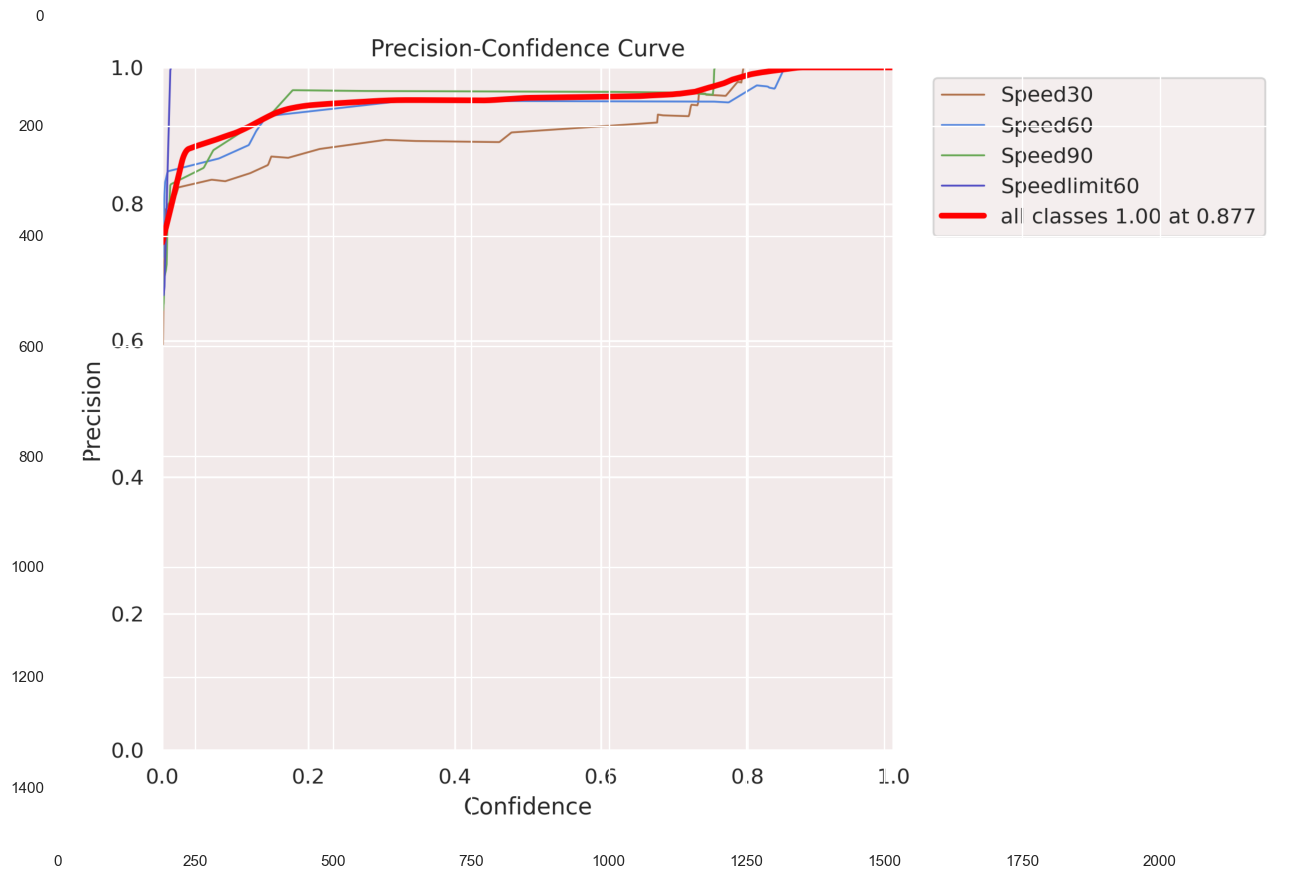

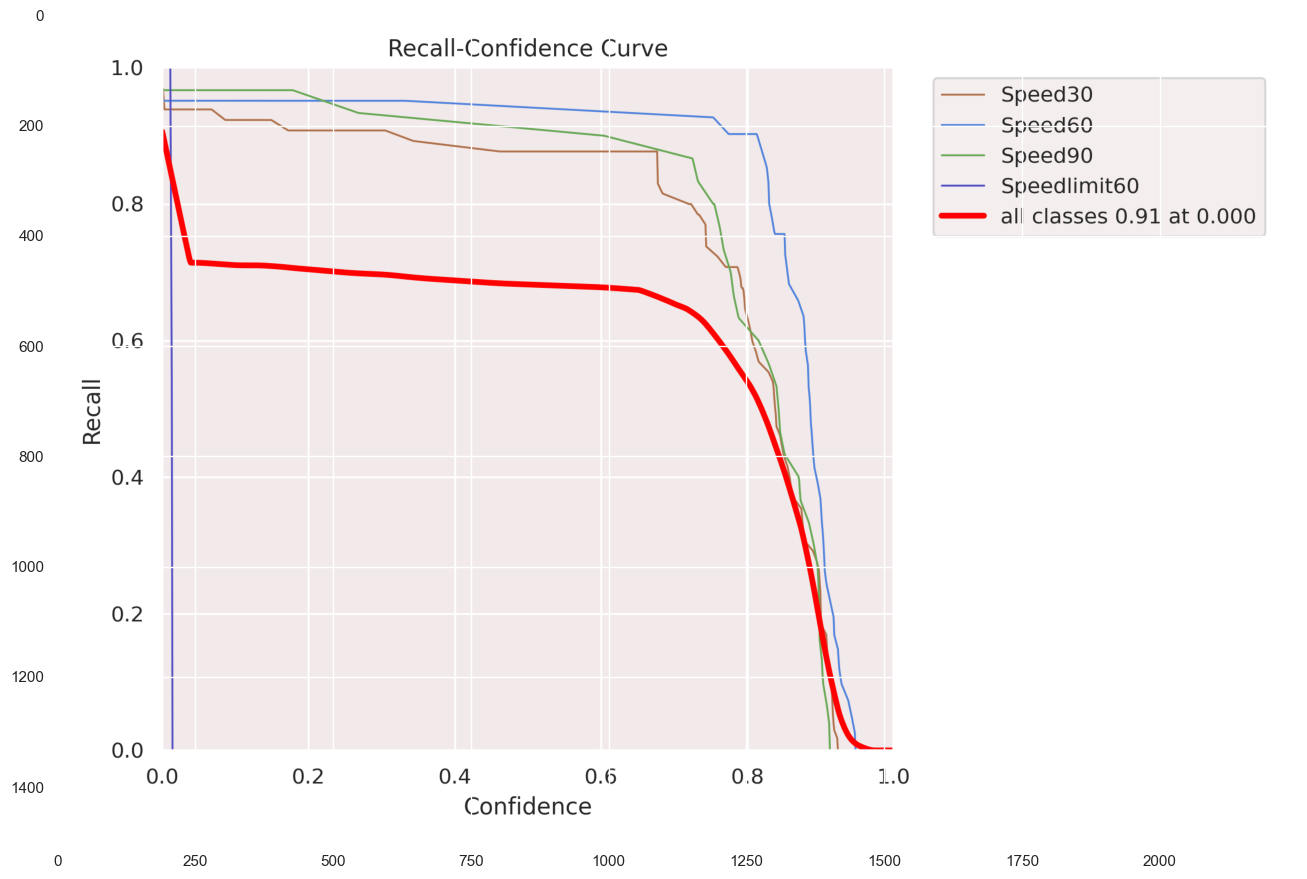

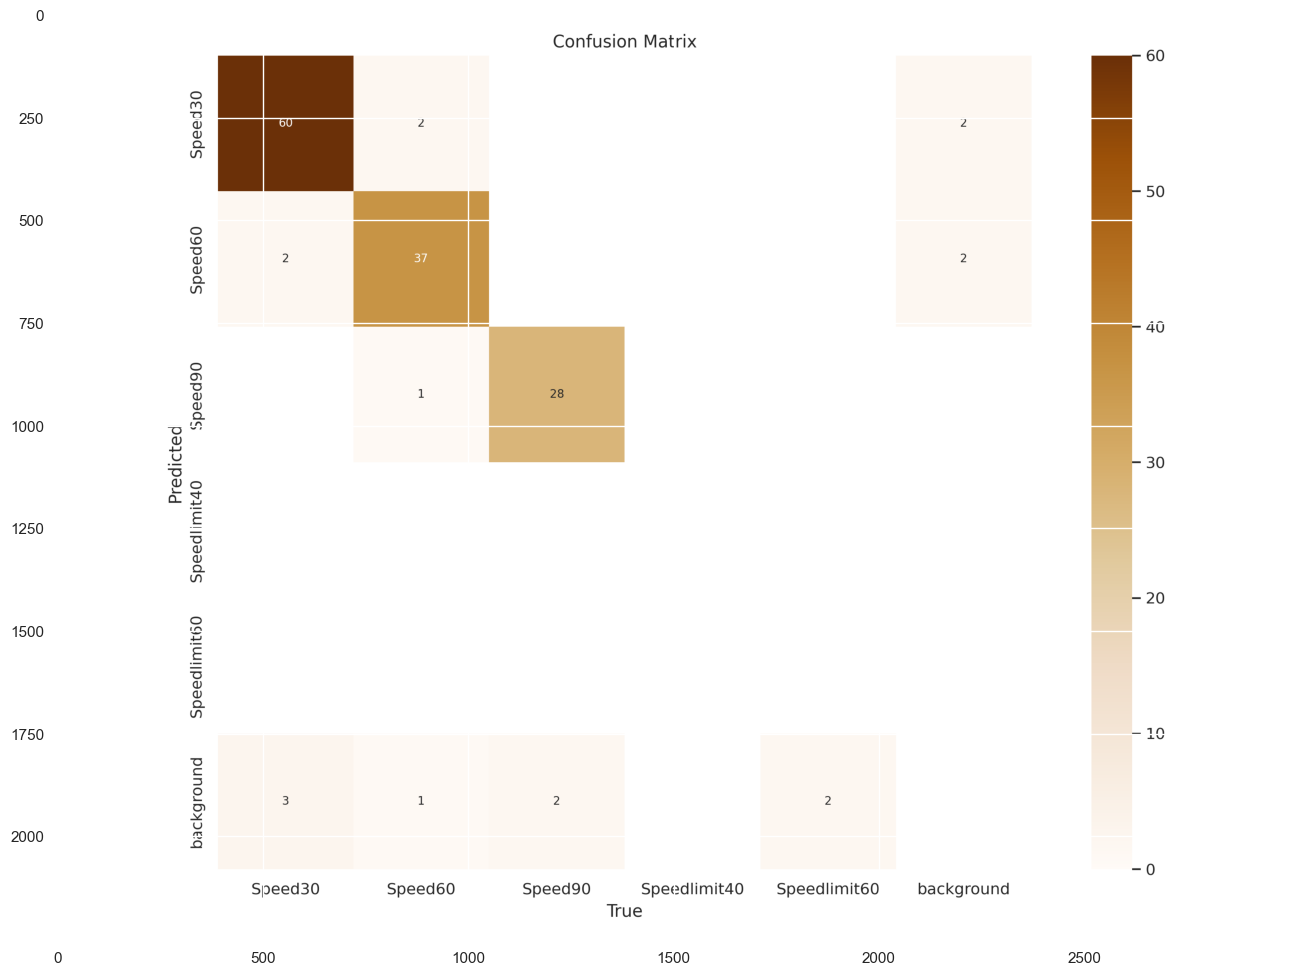

In [13]:
Image_dir = '/Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/Noon.ClearNoon-1/data.yaml'

# Load the image
for i in list_of_metrics:
    image = cv2.imread(f'./runs/detect/train7/{i}')

    # Create a larger figure
    plt.figure(figsize=(16, 12))

    # Display the image
    plt.imshow(image)

    # Show the plot
    plt.show()

In [14]:
Result_Final_model = pd.read_csv('/Volumes/Data/Yolov8_TrafficSign/runs/detect/train18/results.csv')
Result_Final_model.tail(10)

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
10,11,1.4922,1.34940,1.1231,0.73424,0.04286,0.04238,0.02826,1.4074,2.3508,0.78033,0.001109,0.001109,0.001109
11,12,1.4677,1.27630,1.1214,0.71018,0.04286,0.04258,0.02772,1.3800,2.3121,0.76637,0.001010,0.001010,0.001010
12,13,1.4068,1.20470,1.1084,0.98022,0.02857,0.02872,0.01717,1.3461,2.2125,0.78359,0.000911,0.000911,0.000911
13,14,1.4315,1.19090,1.0920,0.97766,0.02857,0.02955,0.02264,1.3401,2.1808,0.78869,0.000812,0.000812,0.000812
14,15,1.4142,1.15880,1.0970,0.97882,0.02857,0.02970,0.02078,1.3543,2.0502,0.84768,0.000713,0.000713,0.000713
15,16,1.3321,1.07220,1.0749,0.97698,0.02857,0.02918,0.02235,1.1747,1.9359,0.76807,0.000614,0.000614,0.000614
16,17,1.3035,1.05420,1.0696,0.97253,0.02857,0.02943,0.01819,1.2812,1.8946,0.78309,0.000515,0.000515,0.000515
17,18,1.3103,1.06190,1.0542,0.97430,0.02857,0.02947,0.02019,1.2039,1.8443,0.76333,0.000416,0.000416,0.000416
18,19,1.2881,0.99914,1.0506,0.97711,0.02857,0.02997,0.01998,1.2666,1.7666,0.78692,0.000317,0.000317,0.000317
19,20,1.2568,0.98437,1.0388,0.97503,0.02857,0.03044,0.02191,1.2149,1.7554,0.76803,0.000218,0.000218,0.000218


In [26]:
df

,epoch,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,2.7278,3.67020,1.9581,0.00583,0.10000,0.00595,0.00355,1.8300,6.7859,0.98320,0.000280,0.000280,0.000280
1,2,1.8723,2.18250,1.3495,0.00500,0.04286,0.00485,0.00267,1.6783,6.4638,0.94164,0.000551,0.000551,0.000551
2,3,1.6876,1.73660,1.2471,0.00520,0.04286,0.03623,0.01604,1.4147,5.7195,0.78860,0.000793,0.000793,0.000793
3,4,1.5817,1.49150,1.1815,0.06523,0.04286,0.04238,0.01633,1.7272,5.0816,0.83060,0.001005,0.001005,0.001005
4,5,1.6956,1.47500,1.2002,0.70293,0.04286,0.04248,0.02044,1.8610,3.9729,0.88664,0.001187,0.001187,0.001187
5,6,1.5108,1.31940,1.1366,0.68810,0.04286,0.04738,0.03152,1.4851,4.0369,0.79301,0.001339,0.001339,0.001339
6,7,1.5240,1.30420,1.1422,0.71610,0.04286,0.04243,0.02713,1.4869,3.0270,0.78960,0.001406,0.001406,0.001406
7,8,1.4969,1.29150,1.1283,0.54203,0.04286,0.03980,0.02547,1.5480,2.9458,0.78657,0.001406,0.001406,0.001406
8,9,1.4838,1.24520,1.1020,0.73451,0.04286,0.04254,0.02638,1.5109,2.2546,0.79226,0.001307,0.001307,0.001307
9,10,1.4387,1.21100,1.1068,0.73172,0.04286,0.04263,0.02561,1.3752,2.1634,0.77021,0.001208,0.001208,0.001208


Index(['epoch', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')


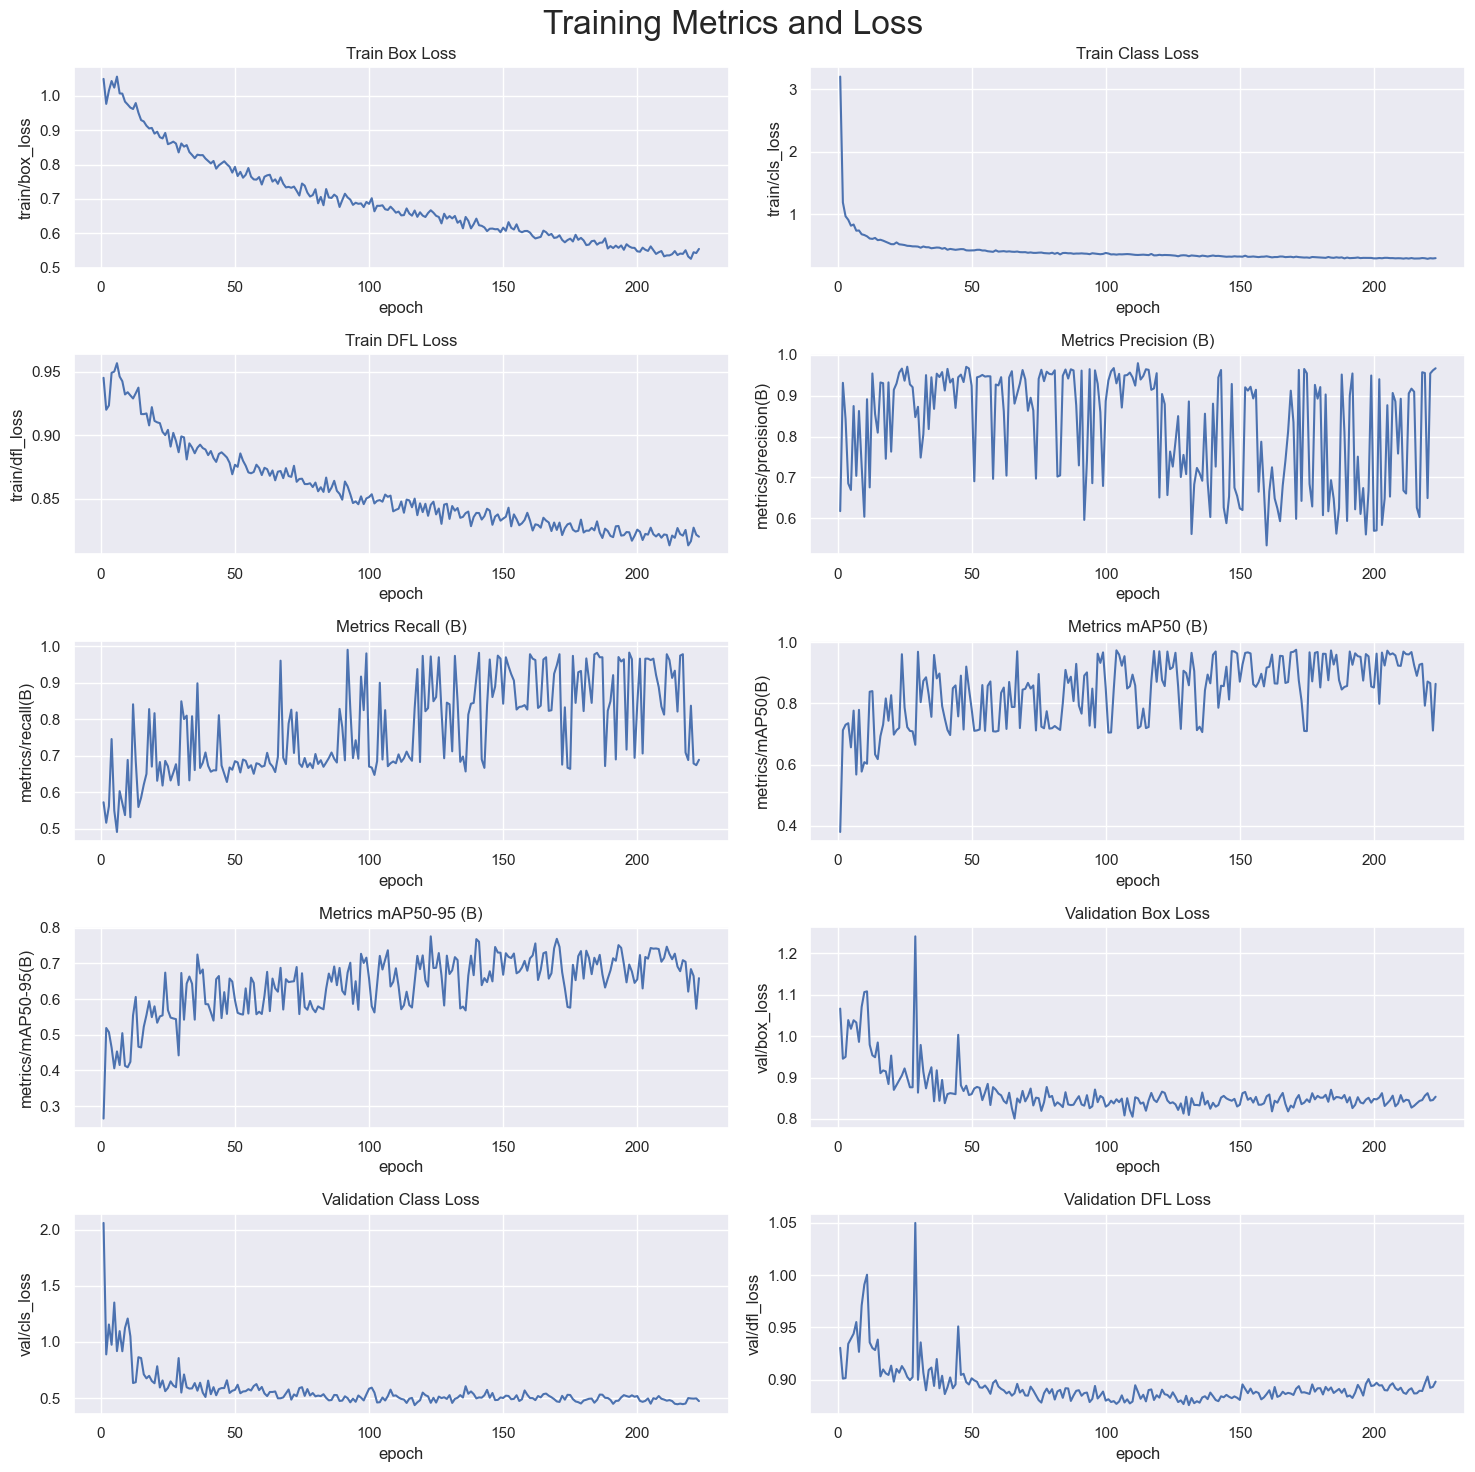

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the CSV file
df = pd.read_csv('./runs/detect/train7/results.csv')

# Ensure column names are correctly recognized
df.columns = df.columns.str.strip()

# Print the column names to verify 'epoch' exists
print(df.columns)

# If 'epoch' is correctly named and exists, proceed with plotting
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))

# Assuming 'epoch' is correctly named in the output of df.columns
# Plot the columns using seaborn
sns.lineplot(x='epoch', y='train/box_loss', data=df, ax=axs[0,0])
sns.lineplot(x='epoch', y='train/cls_loss', data=df, ax=axs[0,1])
sns.lineplot(x='epoch', y='train/dfl_loss', data=df, ax=axs[1,0])
sns.lineplot(x='epoch', y='metrics/precision(B)', data=df, ax=axs[1,1])
sns.lineplot(x='epoch', y='metrics/recall(B)', data=df, ax=axs[2,0])
sns.lineplot(x='epoch', y='metrics/mAP50(B)', data=df, ax=axs[2,1])
sns.lineplot(x='epoch', y='metrics/mAP50-95(B)', data=df, ax=axs[3,0])
sns.lineplot(x='epoch', y='val/box_loss', data=df, ax=axs[3,1])
sns.lineplot(x='epoch', y='val/cls_loss', data=df, ax=axs[4,0])
sns.lineplot(x='epoch', y='val/dfl_loss', data=df, ax=axs[4,1])

# Set titles and axis labels for each subplot
axs[0,0].set(title='Train Box Loss')
axs[0,1].set(title='Train Class Loss')
axs[1,0].set(title='Train DFL Loss')
axs[1,1].set(title='Metrics Precision (B)')
axs[2,0].set(title='Metrics Recall (B)')
axs[2,1].set(title='Metrics mAP50 (B)')
axs[3,0].set(title='Metrics mAP50-95 (B)')
axs[3,1].set(title='Validation Box Loss')
axs[4,0].set(title='Validation Class Loss')
axs[4,1].set(title='Validation DFL Loss')

plt.suptitle('Training Metrics and Loss', fontsize=24)
plt.subplots_adjust(top=0.95) # Adjusted for better layout
plt.tight_layout()
plt.show()

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.2 |</span></b> Validation of the Model By TestSet </b></p>
</div>

In [19]:
# Loading the best performing model
Valid_model = YOLO('best.pt')

# Evaluating the model on the testset
metrics = Valid_model.val(source='')

Ultralytics YOLOv8.0.229 🚀 Python-3.11.8 torch-2.1.2 CPU (Apple M1 Max)
Model summary (fused): 168 layers, 11127519 parameters, 0 gradients, 28.4 GFLOPs


FileNotFoundError: '/home/salem/Noon_Clear/Noon.ClearNoon-5/data.yaml' does not exist

In [30]:
# final results 
print("precision(B): ", metrics.results_dict["metrics/precision(B)"])
print("metrics/recall(B): ", metrics.results_dict["metrics/recall(B)"])
print("metrics/mAP50(B): ", metrics.results_dict["metrics/mAP50(B)"])
print("metrics/mAP50-95(B): ", metrics.results_dict["metrics/mAP50-95(B)"])

precision(B):  0.8247178932206363
metrics/recall(B):  0.40336736412513624
metrics/mAP50(B):  0.4830095722865885
metrics/mAP50-95(B):  0.2849149947606725


**Tip: Based on the observed results, it is evident that the accuracy of the model on both the validation and test data sets exhibits a high degree of similarity. This outcome serves as an indication that the model has been appropriately trained.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227''>5.3 |</span></b> Making Predictions On Test Images </b></p>
</div>

In [38]:
# Path to the directory containing the images
image_dir = './clear_noon'  

# Get a list of all image files in the directory
image_files = [os.path.join(image_dir, file) for file in os.listdir(image_dir) if file.endswith('.png')]
results = []

# Randomly select 10 images from the directory
random_images = random.sample(image_files, k=10)

for image_path in random_images:
    image = cv2.imread(image_path)  # Replace with your preferred method of reading the image
    result = model.predict([image], save=True, conf=0.5, iou=0.5)
    results.append(result)


0: 384x640 (no detections), 68.7ms
Speed: 1.4ms preprocess, 68.7ms inference, 0.3ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3

0: 384x640 (no detections), 63.4ms
Speed: 1.3ms preprocess, 63.4ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3

0: 384x640 (no detections), 65.8ms
Speed: 1.0ms preprocess, 65.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3

0: 384x640 (no detections), 63.0ms
Speed: 1.2ms preprocess, 63.0ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3

0: 384x640 (no detections), 63.8ms
Speed: 1.3ms preprocess, 63.8ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict3

0: 384x640 (no detections), 65.3ms
Speed: 1.0ms preprocess, 65.3ms inference, 0.2ms postprocess per image at shape (1, 3, 384, 640)
Results save

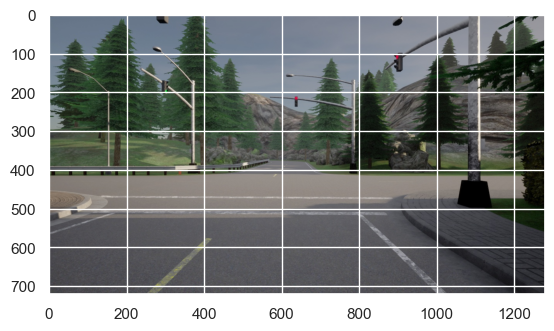

In [35]:
# View results
for i in range(2,3):
    plt.imshow(plt.imread(f'./runs/detect/predict3/image0.jpg'))
    plt.show()

## <b>6 <span style='color:#e61227'>|</span> Export The Final Model Of Detect Traffic Signs </b>

**Tip:** The ultimate goal of training a model is to deploy it for real-world applications. Export mode in Ultralytics YOLOv8 offers a versatile range of options for exporting your trained model to different formats, making it deployable across various platforms and devices.

In [43]:
# Export the model
model.export(format='onnx')

Ultralytics YOLOv8.0.229 🚀 Python-3.11.8 torch-2.1.2 CPU (Apple M1 Max)

PyTorch: starting from 'best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 9, 8400) (21.5 MB)

ONNX: starting export with onnx 1.15.0 opset 17...
ONNX: export success ✅ 0.5s, saved as 'best.onnx' (42.7 MB)

Export complete (1.0s)
Results saved to /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector
Predict:         yolo predict task=detect model=best.onnx imgsz=640  
Validate:        yolo val task=detect model=best.onnx imgsz=640 data=/home/salem/Noon_Clear/Noon.ClearNoon-5/data.yaml  
Visualize:       https://netron.app


'best.onnx'

## <b>7 <span style='color:#e61227'>|</span> Try Pre-trained YOLOv8 For Detect Traffic Signs From Video  </b>
<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.1 |</span></b> Show Original Video Before Detect </b></p>
</div>

**Tip: Due to the substantial volume of the video generated from the image dataset, I have to utilize only a truncated segment of the original video for this project.**

<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'>7.2 |</span></b> Predict By Pr-Trained YOLOv8 </b></p>
</div>

In [47]:
# Load a pr-trained model
video_model = YOLO("best.pt")
 
# Use the model to detect signs
video_model.predict(source="2024-02-19 13-13-40.mp4", show=False, save = True)



WARNING ⚠️ inference results will accumulate in RAM unless `stream=True` is passed, causing potential out-of-memory
errors for large sources or long-running streams and videos. See https://docs.ultralytics.com/modes/predict/ for help.

Example:
    results = model(source=..., stream=True)  # generator of Results objects
    for r in results:
        boxes = r.boxes  # Boxes object for bbox outputs
        masks = r.masks  # Masks object for segment masks outputs
        probs = r.probs  # Class probabilities for classification outputs

video 1/1 (1/55436) /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/2024-02-19 13-13-40.mp4: 384x640 (no detections), 67.1ms
video 1/1 (2/55436) /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/2024-02-19 13-13-40.mp4: 384x640 (no detections), 60.8ms
video 1/1 (3/55436) /Volumes/Data/BA ObjektErkenner/Experiment/TSR/Carla Traffic Sign Detector/2024-02-19 13-13-40.mp4: 384x640 (no detections), 60.6ms


KeyboardInterrupt: 

In [ ]:
# show result
# Convert format
!ffmpeg -y -loglevel panic -i /kaggle/working/runs/detect/predict/video.avi result_out.mp4

# Display the video 
Video("result_out.mp4", width=960)


<div style="color:white;display:fill;border-radius:8px;
            background-color:#03112A;font-size:150%;
            letter-spacing:1.0px;background-image: url(https://i.imgur.com/GVd0La1.png)">
    <p style="padding: 8px;color:white;"><b><b><span style='color:#e61227'></span></b> Thank you for taking the time to review my notebook. If you have any questions or criticisms, please kindly let me know in the comments section.  </b></p>
</div>
